In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class DataGenerator:
    def __init__(self, noise_level=0.2):
        self.noise_level = noise_level  # Stores the noise level for use in other methods of the class.

    def generate_time_series(self, length, seasonal_pattern="daily", trend_type="linear", anomaly_type=None):  # this method generates time series data with certain parameters

        time = np.arange(length)  # Creates an array of integers [0, 1, 2, ..., length-1] representing time steps

        # Seasonal patterns tells about the cyclic pattern
        if seasonal_pattern == "daily":
            seasonal = 1* np.sin(2 * np.pi * time / 24)      # np.sin: Generates a sinusoidal pattern (smooth wave)
        elif seasonal_pattern == "weekly":
            seasonal = np.sin(2 * np.pi * time / (24 * 7))
        else:  # Default to monthly
            seasonal = np.sin(2 * np.pi * time / (24 * 30))

        # Trend patterns tells the overall direction
        if trend_type == "linear":
            trend = time * 0.01
        elif trend_type == "exponential":
            trend = np.exp(time * 0.001)
        else:  # Default to logarithmic
            trend = np.log1p(time)

        # Add noise to make data less perfect, noise array contains x random (x=length) values distributed around 0 with a spread defined by self.noise_level
        noise = np.random.normal(0, self.noise_level, length)  # np.random.normal generates random numbers np.random.normal(mean, std_dev, size)

        series = seasonal + trend + noise #For every time step i, the corresponding seasonal value, trend value, and noise value are added together to get final synthetic time series data

        # Add anomalies if specified
        if anomaly_type == "local":
            anomaly_index = np.random.randint(0, length, size=int(0.05 * length))   # generates an array of 50 random numbers
            series[anomaly_index] += np.random.normal(10, 5, len(anomaly_index))    # adding noise to values at selected indices s,t the noise values vary around 10 with a spread of 5
        elif anomaly_type == "pattern":
            anomaly_index = np.random.randint(0, length, size=int(0.1 * length))    # randomly Picks 10% of the total data points as candidates for pattern anomalies
            series[anomaly_index] = np.mean(series) + 3 * np.std(series)            # Places the anomaly values 3 standard deviations above the mean, in normal distribution 99% data lies in +-3 standard deviations

        return pd.DataFrame({"time": time, "value": series})


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore, kurtosis, skew


class StatisticalAnalysisEngine:
    def __init__(self, window_size=50):
        """
        Initialize the Statistical Analysis Engine with a rolling window size.
        """
        self.window_size = window_size

    def calculate_rolling_statistics(self, data):
        """
        Calculate rolling statistics for the given time series data.
        Parameters:
            data (pd.DataFrame): The input time series DataFrame with 'value' and 'time' columns.
        Returns:
            pd.DataFrame: A DataFrame containing the rolling statistics.
        """
        rolling_mean = data['value'].rolling(window=self.window_size,min_periods=1).mean()
        rolling_median = data['value'].rolling(window=self.window_size,min_periods=1).median()
        rolling_variance = data['value'].rolling(window=self.window_size,min_periods=1).var()
        rolling_skewness = data['value'].rolling(window=self.window_size,min_periods=1).apply(skew, raw=True)
        rolling_kurtosis = data['value'].rolling(window=self.window_size,min_periods=1).apply(kurtosis, raw=True)

        return pd.DataFrame({     # compiling all the statistic data into new dataframe
            "time": data['time'],
            "rolling_mean": rolling_mean,
            "rolling_median": rolling_median,
            "rolling_variance": rolling_variance,
            "rolling_skewness": rolling_skewness,
            "rolling_kurtosis": rolling_kurtosis,
        })

    def detect_anomalies(self, data, threshold=3):
        """
        Detect anomalies using Z-score method.
        Parameters:
            data (pd.DataFrame): The input time series DataFrame with 'value' and 'time' columns.
            threshold (float): The Z-score threshold for detecting anomalies.
        Returns:
            pd.DataFrame: A DataFrame with an additional 'anomaly' column (1 = anomaly, 0 = normal).
        """
        data['z_score'] = zscore(data['value'].fillna(0))
        data['anomaly'] = (np.abs(data['z_score']) > threshold).astype(int)
        return data

In [3]:
class PerformanceOptimizationSystem:
    def __init__(self, max_memory_usage=1e6, sliding_window_size=1000):  # Default size = 1000
        """
        Initialize the Performance Optimization System.
        Parameters:
            max_memory_usage (float): Maximum memory usage limit (in bytes).
            sliding_window_size (int): Size of the sliding window.
        """
        # Take the minimum of sliding_window_size and the calculated maximum data points that fit in memory
        self.max_memory_usage = min(sliding_window_size, int(max_memory_usage / 8))
        self.sliding_window_size = self.max_memory_usage
        self.data_store = []  # Initialize an empty list for sliding window storage.

    def add_data(self, new_data):
        """
        Add new data to the sliding window while maintaining memory constraints.
        Parameters:
            new_data (list): List of new data points to add to the sliding window.
        Returns:
            list: Updated sliding window data.
        """
        self.data_store.extend(new_data)  # Append items in new_data to the data_store
        if len(self.data_store) > self.sliding_window_size:
            # If the sliding window exceeds the size limit, retain only the most recent data points
            self.data_store = self.data_store[-self.sliding_window_size:]
        return self.data_store

    def monitor_performance(self):
        """
        Monitor and display memory usage and data throughput.
        Returns:
            dict: A dictionary containing memory usage (in MB) and current window size.
        """
        current_memory = len(self.data_store) * 8  # Approximate memory usage in bytes (float64 uses 8 bytes per element)
        return {
            "current_memory_usage_MB": current_memory / 1e6,  # Convert bytes to megabytes.
            "sliding_window_size": len(self.data_store)  # Current number of data points in the sliding window.
        }

Performance Metrics: {'current_memory_usage_MB': 0.00072, 'sliding_window_size': 90}
Updated Data Store: [0.6986224882180676, 1.2203173813187143, 1.5257606062549818, 1.9550041394206699, 1.7899671997731912, 1.8579067234563031, 1.7737657531147892, 2.3647646623741583, 1.8410208246624995, 1.5013142668741752, 1.5872927663554675, 1.1134182505053662, 0.9917774655233784, 0.4007854159164105, 0.39375111258232703, 0.15613385561201423, 0.05767239284542977, -0.00951729633416129, -0.407055208992231, 0.05434975540852247, 0.02403997025588231, 0.26448512553186176, 0.49320412177980266, 0.6639434915135727, 1.182486083097728, 1.4125385808946886, 1.6095784517625233, 1.7435671456126776, 1.8917831779251209, 1.967819538707142, 6.3771589321471165, 2.2345073607945376, 1.9987938049651184, 1.6084565885373732, 1.774619684394168, 1.1032906449236002, 0.8211022787194275, 0.9494242877452931, 0.19163156509563034, 0.33741510418209697, 0.39744801655065176, 0.4090247922273695, 0.372448856218225, 0.044858502693702625, 0.15

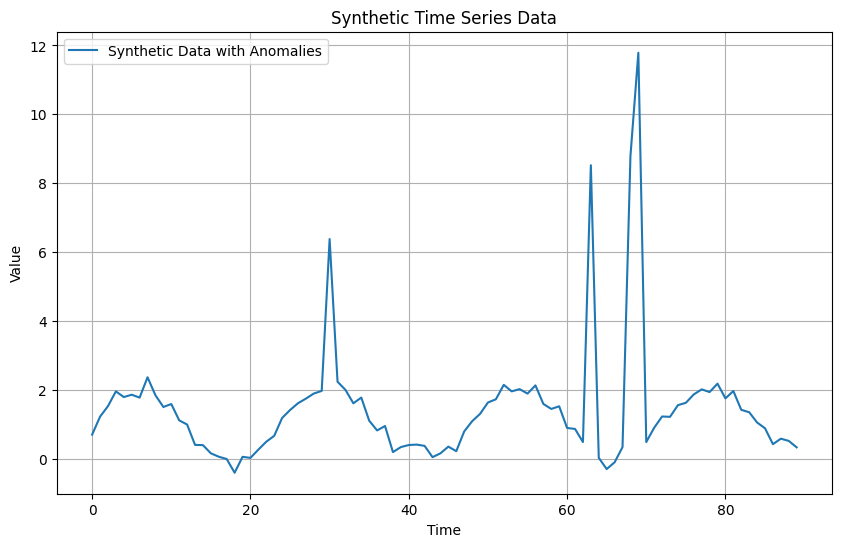

rolls     time  rolling_mean  rolling_median  rolling_variance  rolling_skewness  \
0      0      0.698622        0.698622               NaN               NaN   
1      1      0.959470        0.959470          0.136083          0.000000   
2      2      1.148233        1.220317          0.174936         -0.307213   
3      3      1.349926        1.373039          0.279344         -0.134236   
4      4      1.437934        1.525761          0.248235         -0.523975   
..   ...           ...             ...               ...               ...   
85    85      1.481348        1.263026          3.376768          3.606875   
86    86      1.469169        1.225591          3.350408          3.624654   
87    87      1.459078        1.222954          3.320857          3.646052   
88    88      1.448490        1.220317          3.293097          3.666061   
89    89      1.436058        1.217767          3.270006          3.681166   

    rolling_kurtosis  
0                NaN  
1          

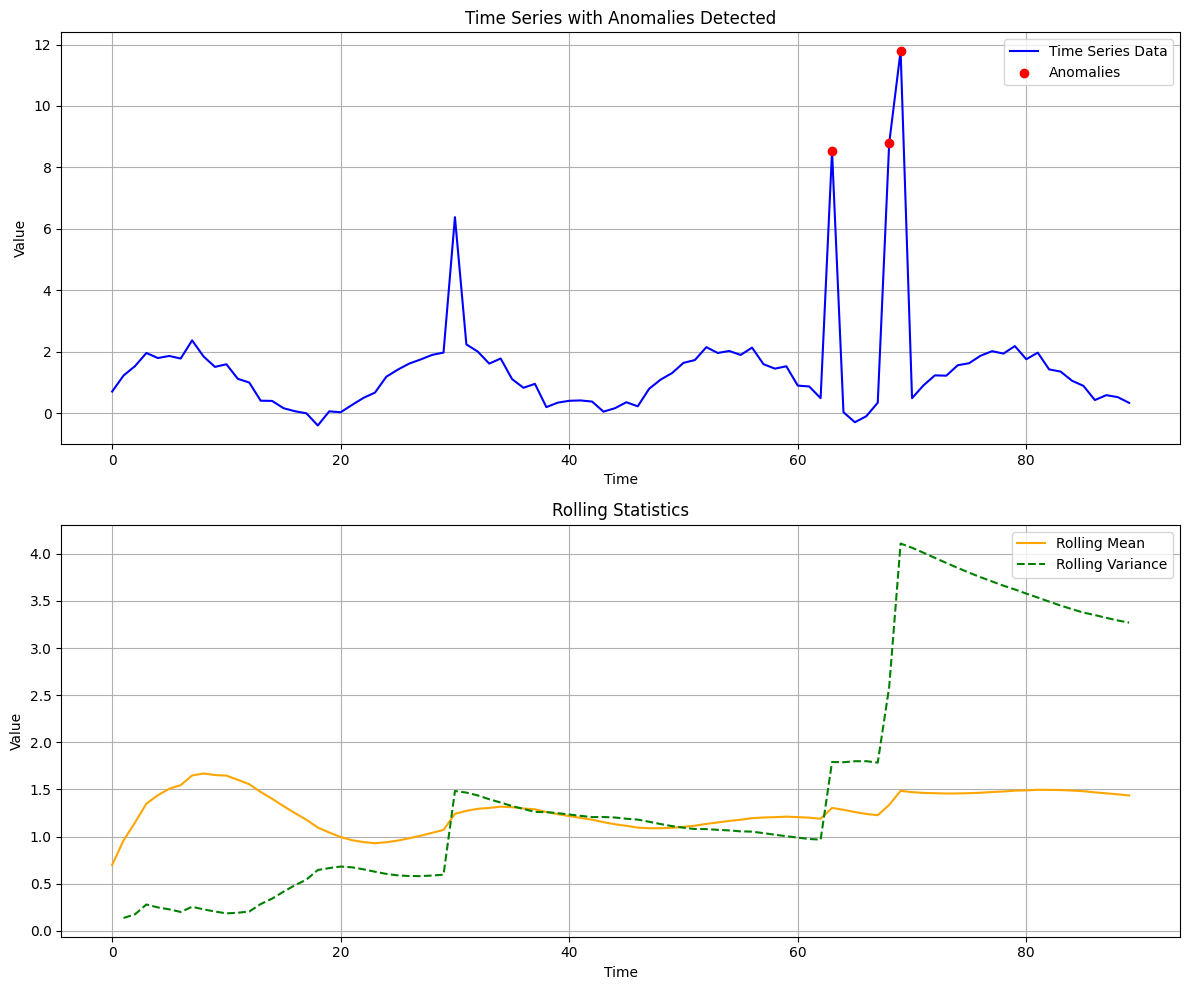

In [5]:
from types import new_class
perf_system = PerformanceOptimizationSystem(sliding_window_size=90)

data_gen = DataGenerator(noise_level=0.2)


new_data = data_gen.generate_time_series(
    length=perf_system.sliding_window_size,
    seasonal_pattern="daily",
    trend_type="exponential",
    anomaly_type="local"
)

updated_data_store = perf_system.add_data(new_data.value) # current state of sliding window after new data points are added
performance_metrics = perf_system.monitor_performance()
print("Performance Metrics:", performance_metrics)
print("Updated Data Store:", updated_data_store)







plt.figure(figsize=(10, 6))
plt.plot(new_data['time'], new_data['value'], label="Synthetic Data with Anomalies")
plt.title("Synthetic Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()



#print("original",new_data)
analysis_engine = StatisticalAnalysisEngine(window_size=perf_system.sliding_window_size)
rolling_stats = analysis_engine.calculate_rolling_statistics(new_data)
print("rolls",rolling_stats)

anomaly_data = analysis_engine.detect_anomalies(new_data.copy())  # detecting anomalies in dataset using detect anomalies method


# Visualization of Results
fig, ax = plt.subplots(2, 1, figsize=(12, 10))


# Plot the original data with anomalies
ax[0].plot(anomaly_data['time'], anomaly_data['value'], label="Time Series Data", color="blue")
ax[0].scatter(
    anomaly_data['time'][anomaly_data['anomaly'] == 1],
    anomaly_data['value'][anomaly_data['anomaly'] == 1],
    color='red', label="Anomalies", zorder=5
)
ax[0].set_title("Time Series with Anomalies Detected")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Value")
ax[0].legend()
ax[0].grid()

# Plot rolling mean and variance
ax[1].plot(rolling_stats['time'], rolling_stats['rolling_mean'], label="Rolling Mean", color="orange")
ax[1].plot(rolling_stats['time'], rolling_stats['rolling_variance'], label="Rolling Variance", linestyle="dashed", color="green")
ax[1].set_title("Rolling Statistics")
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Value")
ax[1].legend()
ax[1].grid()

# Final adjustments and display
plt.tight_layout()
plt.show()
